In [2]:
import pandas as pd

# Load the data from the CSV file to inspect its structure
file_path = '../results_csv/LR_results_filters/run_6/filter_results_csp_bbcpy.csv'
data = pd.read_csv(file_path)

# Displaying the first few rows of the dataframe to understand its structure
data


,filter,excllev,fold,score
0,4,NaN,1,0.993827
1,4,NaN,2,0.993827
2,4,NaN,3,0.975309
3,4,NaN,4,0.981481
4,4,NaN,5,0.870370
...,...,...,...,...
175,10,100.0,1,0.993827
176,10,100.0,2,0.993827
177,10,100.0,3,0.975309
178,10,100.0,4,0.981481


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of the seaborn
sns.set(style="whitegrid")

C:\Users\alioo\Desktop\MA\bbcpy_AutoML\bbcpy_env\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1400x700 with 0 Axes>

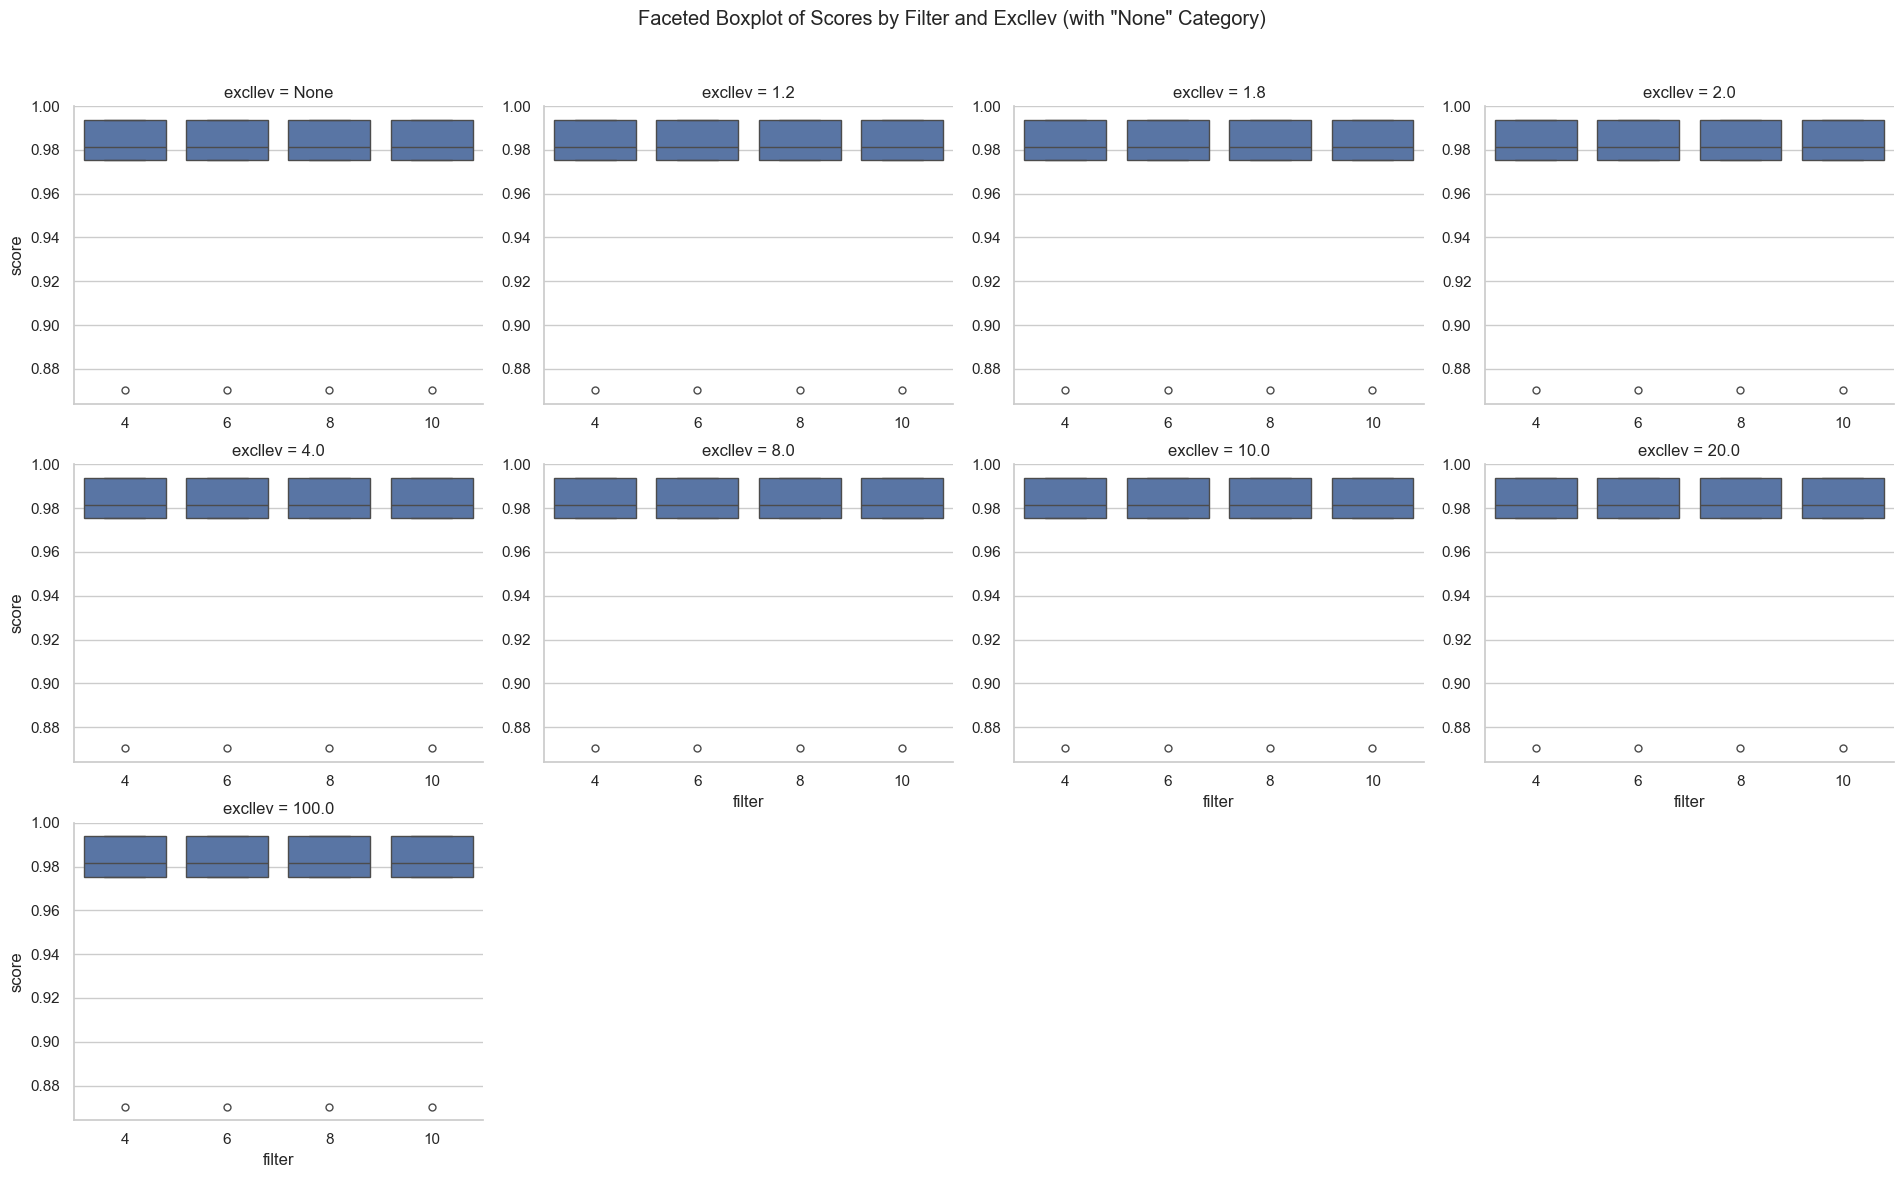

In [6]:
# Replace NaN values in 'excllev' with the category 'None'
data['excllev'].fillna('None', inplace=True)

# Plotting the faceted boxplot with the adjusted 'excllev' categories
plt.figure(figsize=(14, 7))
g = sns.catplot(x='filter', y='score', col='excllev', 
                data=data, kind='box', 
                col_wrap=4, sharex=False, sharey=False, 
                height=4, aspect=1.2)

g.fig.subplots_adjust(top=0.9) # adjust the Figure in g
g.fig.suptitle('Faceted Boxplot of Scores by Filter and Excllev (with "None" Category)')

plt.show()

In [7]:
# To find the best parameters that aim for the highest score, we'll group the data by 'filter' and 'excllev' and then calculate the mean score for each group.
grouped_data = data.groupby(['filter', 'excllev'], as_index=False)['score'].mean()

# Now we'll find the group with the highest average score.
best_params = grouped_data.loc[grouped_data['score'].idxmax()]

best_params


filter            4
excllev         1.2
score      0.962963
Name: 0, dtype: object